In [ ]:
#C:\Users\Admin\Downloads\1-25-images

In [ ]:
#Segmentation code

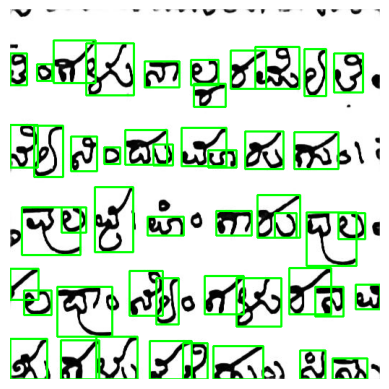

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Admin\Downloads\1-25-images\i6_output.jpg")
#r'C:\Users\Admin\Downloads\i2_output.png'

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding to create a binary image
_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours (text regions)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image to draw contours
segmented_image = image.copy()

# Iterate through contours and extract bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Filter out small contours (noise)
    if w > 20 and h > 20:
        cv2.rectangle(segmented_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
# Apply morphological operations to clean up noise

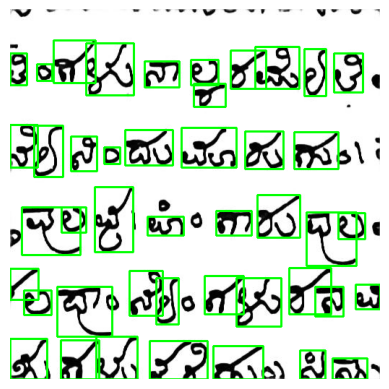

In [16]:
# Apply morphological operations to clean up noise
kernel = np.ones((5, 5), np.uint8)
morphed_image = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours again after morphological operation
contours, _ = cv2.findContours(morphed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image to draw contours
segmented_image = image.copy()

# Iterate through contours and extract bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Filter out small contours
    if w > 20 and h > 20:
        cv2.rectangle(segmented_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
#charactor Recognition

In [17]:
import pytesseract
from PIL import Image

# Set the path to the Tesseract executable if it's not in your PATH (Windows only)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the image (replace 'your_image.jpg' with your actual image file)
image = Image.open(r'C:\Users\Admin\Downloads\i2_output.png')

# Extract Kannada text from the image
# Use 'kan' for Kannada language
text = pytesseract.image_to_string(image, lang='kan')

print("Extracted Kannada Text:", text)


Extracted Kannada Text: ಐಷ್ತುವ ಉಯಸ್ಸುನಂ ಪಾಡಿ
ಓವ ಹಯ ಹಳಲಾಗ'
ಇಎ-ಲಈಾಸಿಗಗ್ರಹ
ಖಾ 305 ಮುಖ್‌
ಸಾಂತ ತಾ ಇಷ್ಟುಷೂ
'ತಾಯ್ರ್‌ ಶಮಃ
ಹಿಫ್ರೆಕೆಕಕಾಯೆಸಡ್ರಾರ

1. /. ಸ, 191  6ಗ |. ್ಜ



In [18]:
import pytesseract

# Assuming the region of interest (ROI) is the segmented text area
roi = segmented_image[y:y+h, x:x+w]

# Use Tesseract OCR to extract text
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ಅಆಇಈಉಊಋೠಎಆಇಊಋ'
text = pytesseract.image_to_string(roi, config=custom_config)

print("Recognized Text:", text)


Recognized Text: 


In [ ]:
#Performance Analysis

In [19]:
import cv2
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Load ground truth and predicted mask images
ground_truth = cv2.imread(r'C:\Users\Admin\Downloads\i2_output.png', cv2.IMREAD_GRAYSCALE)
predicted_mask = cv2.imread(r'C:\Users\Admin\Downloads\predicted_image.png', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if ground_truth is None:
    raise ValueError("Error: Ground truth image not loaded.")
if predicted_mask is None:
    raise ValueError("Error: Predicted mask image not loaded.")

# Resize the predicted mask to match the ground truth size
predicted_mask = cv2.resize(predicted_mask, (ground_truth.shape[1], ground_truth.shape[0]))

# Binarize images (convert non-zero values to 1)
_, ground_truth = cv2.threshold(ground_truth, 127, 255, cv2.THRESH_BINARY)
_, predicted_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)

# Calculate Intersection over Union (IoU)
intersection = np.sum(np.logical_and(ground_truth, predicted_mask))
union = np.sum(np.logical_or(ground_truth, predicted_mask))
iou = intersection / union if union != 0 else 0  # Avoid division by zero
print(f"Intersection over Union (IoU): {iou:.4f}")

# Calculate Precision, Recall, and F1-Score
precision = precision_score(ground_truth.flatten(), predicted_mask.flatten(), pos_label=255)
recall = recall_score(ground_truth.flatten(), predicted_mask.flatten(), pos_label=255)
f1 = f1_score(ground_truth.flatten(), predicted_mask.flatten(), pos_label=255)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Calculate Dice Coefficient (similar to F1-score)
dice_coefficient = 2 * intersection / (np.sum(ground_truth) + np.sum(predicted_mask)) if (np.sum(ground_truth) + np.sum(predicted_mask)) != 0 else 0
print(f"Dice Coefficient: {dice_coefficient:.4f}")


Intersection over Union (IoU): 0.7633
Precision: 0.8563
Recall: 0.8754
F1-Score: 0.8657
Dice Coefficient: 0.0034


In [ ]:
#Performance Analysis

In [20]:
import cv2
import numpy as np

def calculate_mse(image1, image2):
    """
    Calculate the Mean Squared Error (MSE) between two images.
    """
    if image1.shape != image2.shape:
        raise ValueError("Input images must have the same dimensions.")
    mse = np.mean((image1 - image2) ** 2)
    return mse

def calculate_psnr(image1, image2):
    """
    Calculate the Peak Signal-to-Noise Ratio (PSNR) between two images.
    """
    mse = calculate_mse(image1, image2)
    if mse == 0:
        return float('inf')  # PSNR is infinite if MSE is zero (images are identical)
    max_pixel = 255.0  # Assuming 8-bit image
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load the two images
image1 = cv2.imread(r'C:\Users\Admin\Downloads\i2_output.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(r'C:\Users\Admin\Downloads\predicted_image.png', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded
if image1 is None:
    raise ValueError("Error: Image1 not loaded. Check the file path.")
if image2 is None:
    raise ValueError("Error: Image2 not loaded. Check the file path.")

# Resize images to the same size if needed
if image1.shape != image2.shape:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Calculate MSE and PSNR
mse = calculate_mse(image1, image2)
psnr = calculate_psnr(image1, image2)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr:.4f} dB")


Mean Squared Error (MSE): 60.2453
Peak Signal-to-Noise Ratio (PSNR): 30.3316 dB


In [21]:
difference = cv2.absdiff(image1, image2)
cv2.imshow("Difference", difference.astype(np.uint8))  # Show pixel differences
cv2.waitKey(0)
cv2.destroyAllWindows()


In [22]:
_, image1 = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY)
_, image2 = cv2.threshold(image2, 127, 255, cv2.THRESH_BINARY)


In [ ]:
#Performance Analysis

In [23]:
print(f"Image1 unique values: {np.unique(image1)}")
print(f"Image2 unique values: {np.unique(image2)}")

mse = np.mean((image1 - image2) ** 2)
print(f"MSE: {mse:.4f}")


Image1 unique values: [  0 255]
Image2 unique values: [  0 255]
MSE: 0.2285


In [24]:
import cv2
import numpy as np

def count_characters_in_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error: Image not loaded. Check the file path.")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)  # Inverted for contour detection

    # Perform morphological operations to refine character regions
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))  # Adjust kernel size if needed
    morphed = cv2.erode(binary, kernel, iterations=1)

    # Find contours (character-like structures)
    contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to count valid characters
    character_count = 0
    for contour in contours:
        # Get bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Ignore small contours that may be noise
        if w > 5 and h > 5:  # Minimum width and height for a valid character
            character_count += 1

            # (Optional) Draw bounding boxes around detected characters
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

    # Display the image with bounding boxes (optional)
    cv2.imshow("Character Detection", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    print(f"Number of characters detected: {character_count}")
    return character_count

# Example Usage
image_path = r"C:\Users\Admin\LS-HDIB\i1_output.jpg"  # Path to your text image
character_count = count_characters_in_image(image_path)
print(f"Total characters in the image: {character_count}")

Number of characters detected: 138
Total characters in the image: 138


In [25]:
import cv2
import pytesseract

# Set the path to the Tesseract executable if required (Windows Example)
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def count_text_elements_in_kannada(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error: Image not loaded. Check the file path.")

    # Preprocess the image for better OCR results (convert to grayscale and thresholding)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)  # Binarization

    # Perform OCR to extract text in Kannada using the 'kan' language code
    extracted_text = pytesseract.image_to_string(binary, lang='kan')

    # Count characters, spaces, and symbols
    char_count = sum(c.isalnum() for c in extracted_text)  # Alphanumeric characters
    space_count = extracted_text.count(" ")  # Spaces
    symbol_count = sum(not c.isalnum() and not c.isspace() for c in extracted_text)  # Non-alphanumeric, non-space

    # Print results
    print(f"Extracted Text (Kannada):\n{extracted_text}")
    print(f"Character Count (Alphanumeric): {char_count}")
    print(f"Space Count: {space_count}")
    print(f"Symbol Count: {symbol_count}")

    return char_count, space_count, symbol_count

# Example Usage
image_path =  r"C:\Users\Admin\LS-HDIB\i1_output.jpg"  # Path to your Kannada text image
char_count, space_count, symbol_count = count_text_elements_in_kannada(image_path)
print(f"Total Characters: {char_count}, Spaces: {space_count}, Symbols: {symbol_count}")


Extracted Text (Kannada):
ಠಿ ಸಸ ಇಸ್‌ ಎಂಬ ಪ್ರಶ
ಇತ್ತಾಕಾಬಂಪಣಾ ತ್ತ ಪ್ರ
ು ಏಲ್ಲಅತೊತಾಕೊಸಸಡ
ಬತಜಜಬಂರಾ ಯತಾ
ಆ
ನಡಸ ತಳಲಾಗಿ
ಗುಡ ತಎತ)
ಇರ ಇ ಉಮ ಸ
ಮ್ನ ಎರಿಸ್‌ -8ೆ ಇಂಧ

Character Count (Alphanumeric): 66
Space Count: 16
Symbol Count: 31
Total Characters: 66, Spaces: 16, Symbols: 31


In [26]:
#----Line Segmentation#
import cv2
import numpy as np
import pytesseract
import os

# Set the path to tesseract executable (modify this based on your system)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the image
image_path = r"C:\\Users\\Admin\\Downloads\\predicted_image1.png"
#C:\Users\Admin\LS-HDIB\i6_output.jpg
#C:\\Users\\Admin\\Downloads\\predicted_image.png"
#r"C:\Users\Admin\Downloads\1-25-images\i6_output.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Line Segmentation using contours
kernel_line = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 20))  # Kernel for detecting horizontal regions
lines = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_line)

# Find contours of lines
line_contours, _ = cv2.findContours(lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours top-to-bottom
line_contours = sorted(line_contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

for i, line_contour in enumerate(line_contours):
    x, y, w, h = cv2.boundingRect(line_contour)
    line_img = image[y:y+h, x:x+w]

    # Save or display each line (optional)
    cv2.imshow(f"Line {i+1}", line_img)

    # Word Segmentation within each line
    kernel_word = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))  # Kernel for detecting vertical word regions
    words = cv2.morphologyEx(binary[y:y+h, x:x+w], cv2.MORPH_CLOSE, kernel_word)

    # Find contours of words
    word_contours, _ = cv2.findContours(words, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort word contours left-to-right
    word_contours = sorted(word_contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    for j, word_contour in enumerate(word_contours):
        wx, wy, ww, wh = cv2.boundingRect(word_contour)
        word_img = line_img[wy:wy+wh, wx:wx+ww]

        # Save or display each word (optional)
        cv2.imshow(f"Line {i+1} - Word {j+1}", word_img)
     
    output_folder = r"C:\\Users\\Admin\\Downloads\\segmentation_output"  # Specify the folder to save word images
    os.makedirs(output_folder, exist_ok=True)

    for j, word_contour in enumerate(word_contours):
        # Get bounding box of the word
        wx, wy, ww, wh = cv2.boundingRect(word_contour)
        word_img = line_img[wy:wy+wh, wx:wx+ww]

        # Save each word image with a unique filename
        filename = os.path.join(output_folder, f"line_{i+1}_word_{j+1}.png")
        cv2.imwrite(filename, word_img)
        print(f"Saved: {filename}")
        
        # Uncomment this if OCR is needed
        # text = pytesseract.image_to_string(word_img, config="--psm 8")
        # print(f"Line {i+1}, Word {j+1}: {text.strip()}")

cv2.waitKey(0)
cv2.destroyAllWindows()


Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_1_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_2_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_3_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_4_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_5_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_6_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_7_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_8_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_9_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_10_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_11_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_12_word_1.png
Saved: C:\\Users\\Admin\\Downloads\\segmentation_output\line_13_word_1.png
Saved: C:\\Users\\Admin\\Downloads

In [1]:
import cv2
import pytesseract
import numpy as np

# Set the path to the Tesseract executable if required (Windows Example)
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def segment_text(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error: Image not loaded. Check the file path.")

    # Convert to grayscale and binarize the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)  # Invert for text detection

    # Perform dilation to join nearby text components
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=2)

    # Find contours for character segmentation
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    char_segments = []
    
    for contour in contours:
        # Get bounding box for each contour (character)
        x, y, w, h = cv2.boundingRect(contour)
        if w > 5 and h > 5:  # Filter out very small contours
            char_segments.append((x, y, w, h))
            # Draw bounding box around each character (optional)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

    # Sort character bounding boxes from left to right
    char_segments.sort(key=lambda x: x[0])  # Sort by x-coordinate

    # Display the image with character segmentation (optional)
    cv2.imshow("Character Segmentation", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Perform word segmentation using the horizontal position of characters
    words = []
    word = []
    prev_x_end = 0  # Track the end of the previous character
    for (x, y, w, h) in char_segments:
        if x > prev_x_end + 5:  # If the current character is far enough from the previous one
            if word:
                words.append(word)  # Add current word to list
            word = [(x, y, w, h)]  # Start a new word with the current character
        else:
            word.append((x, y, w, h))  # Add the character to the current word
        prev_x_end = x + w

    if word:
        words.append(word)  # Add the last word

    # Draw bounding boxes around words
    for word in words:
        x_min = min([x for x, y, w, h in word])
        y_min = min([y for x, y, w, h in word])
        x_max = max([x + w for x, y, w, h in word])
        y_max = max([y + h for x, y, w, h in word])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    # Perform line segmentation by grouping words vertically
    lines = []
    line = []
    prev_y_end = 0  # Track the vertical position of the previous word
    for word in words:
        word_y_min = min([y for x, y, w, h in word])
        if word_y_min > prev_y_end + 5:  # If the current word is far enough from the previous word vertically
            if line:
                lines.append(line)  # Add current line to list
            line = [word]  # Start a new line with the current word
        else:
            line.append(word)  # Add the word to the current line
        prev_y_end = max([y + h for x, y, w, h in word])

    if line:
        lines.append(line)  # Add the last line

    # Draw bounding boxes around lines
    for line in lines:
        x_min = min([x for word in line for x, y, w, h in word])
        y_min = min([y for word in line for x, y, w, h in word])
        x_max = max([x + w for word in line for x, y, w, h in word])
        y_max = max([y + h for word in line for x, y, w, h in word])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

    # Display the final image with line segmentation (optional)
    cv2.imshow("Line Segmentation", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Optionally return segmented data (characters, words, lines)
    return char_segments, words, lines

# Example Usage
image_path = r"C:\\Users\\Admin\\Downloads\\i2_output.png" # Path to your text image
char_segments, words, lines = segment_text(image_path)
print(f"Number of characters: {len(char_segments)}")
print(f"Number of words: {len(words)}")
print(f"Number of lines: {len(lines)}")


Number of characters: 78
Number of words: 1
Number of lines: 1


Number of Characters: 78
Number of Words: 1
Number of Lines: 1


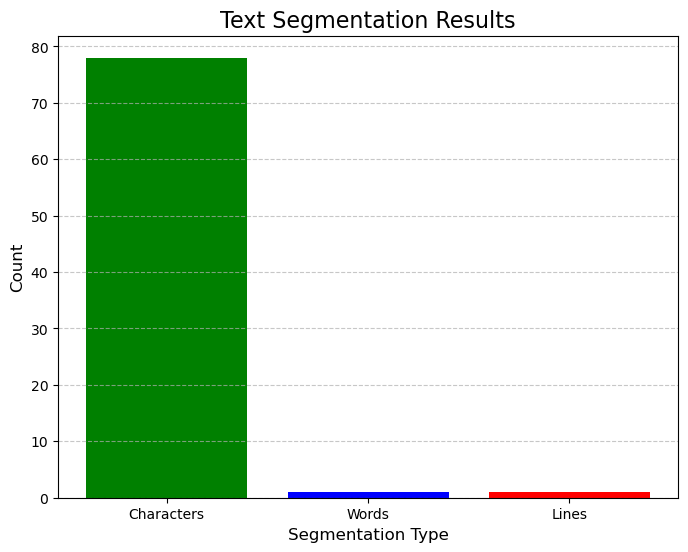

<Figure size 640x480 with 0 Axes>

In [2]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the Tesseract executable if required (Windows Example)
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def segment_text(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error: Image not loaded. Check the file path.")

    # Convert to grayscale and binarize the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)  # Invert for text detection

    # Perform dilation to join nearby text components
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=2)

    # Find contours for character segmentation
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    char_segments = []
    
    for contour in contours:
        # Get bounding box for each contour (character)
        x, y, w, h = cv2.boundingRect(contour)
        if w > 5 and h > 5:  # Filter out very small contours
            char_segments.append((x, y, w, h))

    # Sort character bounding boxes from left to right
    char_segments.sort(key=lambda x: x[0])  # Sort by x-coordinate

    # Perform word segmentation using the horizontal position of characters
    words = []
    word = []
    prev_x_end = 0  # Track the end of the previous character
    for (x, y, w, h) in char_segments:
        if x > prev_x_end + 5:  # If the current character is far enough from the previous one
            if word:
                words.append(word)  # Add current word to list
            word = [(x, y, w, h)]  # Start a new word with the current character
        else:
            word.append((x, y, w, h))  # Add the character to the current word
        prev_x_end = x + w

    if word:
        words.append(word)  # Add the last word

    # Perform line segmentation by grouping words vertically
    lines = []
    line = []
    prev_y_end = 0  # Track the vertical position of the previous word
    for word in words:
        word_y_min = min([y for x, y, w, h in word])
        if word_y_min > prev_y_end + 5:  # If the current word is far enough from the previous word vertically
            if line:
                lines.append(line)  # Add current line to list
            line = [word]  # Start a new line with the current word
        else:
            line.append(word)  # Add the word to the current line
        prev_y_end = max([y + h for x, y, w, h in word])

    if line:
        lines.append(line)  # Add the last line

    # Return segmented data
    return len(char_segments), len(words), len(lines)

def plot_segmentation_results(char_count, word_count, line_count):
    # Prepare data for the graph
    categories = ['Characters', 'Words', 'Lines']
    counts = [char_count, word_count, line_count]

    # Create a bar graph
    plt.figure(figsize=(8, 6))
    plt.bar(categories, counts, color=['green', 'blue', 'red'])
    plt.xlabel('Segmentation Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Text Segmentation Results', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example Usage
image_path = r"C:\\Users\\Admin\\Downloads\\i2_output.png"   # Path to your text image
char_count, word_count, line_count = segment_text(image_path)

# Print counts
print(f"Number of Characters: {char_count}")
print(f"Number of Words: {word_count}")
print(f"Number of Lines: {line_count}")

# Plot the results
plot_segmentation_results(char_count, word_count, line_count)
plt.savefig('segmentation_results.png')

In [5]:
import cv2
import pytesseract
import numpy as np

# Set Tesseract path if necessary (Windows example)
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def preprocess_image(image_path):
    """Preprocess the input image."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error: Image not loaded. Check the file path.")
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)  # Binarization (invert for white text)
    return binary

def segment_text_lines(binary_image):
    """Segment text lines using horizontal projections."""
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
    dilated = cv2.dilate(binary_image, horizontal_kernel, iterations=1)
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    line_boxes = [cv2.boundingRect(c) for c in contours]
    line_boxes = sorted(line_boxes, key=lambda x: x[1])  # Sort by y-coordinate
    return line_boxes

def segment_words(line_image):
    """Segment words in a text line using vertical projections."""
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 10))
    dilated = cv2.dilate(line_image, vertical_kernel, iterations=1)
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    word_boxes = [cv2.boundingRect(c) for c in contours]
    word_boxes = sorted(word_boxes, key=lambda x: x[0])  # Sort by x-coordinate
    return word_boxes

def segment_characters(word_image):
    """Segment characters in a word."""
    contours, _ = cv2.findContours(word_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    char_boxes = [cv2.boundingRect(c) for c in contours]
    char_boxes = sorted(char_boxes, key=lambda x: x[0])  # Sort by x-coordinate
    return char_boxes

def recognize_text(image, lang='kan'):
    """Recognize text using Tesseract."""
    return pytesseract.image_to_string(image, lang=lang)

def main(image_path):
    # Preprocess the image
    binary_image = preprocess_image(image_path)

    # Segment text lines
    line_boxes = segment_text_lines(binary_image)
    print(f"Number of text lines: {len(line_boxes)}")
    
    for i, (x, y, w, h) in enumerate(line_boxes):
        line_image = binary_image[y:y+h, x:x+w]
        
        # Segment words in the line
        word_boxes = segment_words(line_image)
        print(f" Line {i+1} - Number of words: {len(word_boxes)}")
        
        for j, (wx, wy, ww, wh) in enumerate(word_boxes):
            word_image = line_image[wy:wy+wh, wx:wx+ww]
            
            # Recognize the word using Tesseract
            word_text = recognize_text(word_image, lang='kan')
            print(f"  Word {j+1}: {word_text.strip()}")
            
            # Segment characters in the word
            char_boxes = segment_characters(word_image)
            print(f"   Number of characters: {len(char_boxes)}")
            
            for k, (cx, cy, cw, ch) in enumerate(char_boxes):
                char_image = word_image[cy:cy+ch, cx:cx+cw]
                char_text = recognize_text(char_image, lang='kan')
                print(f"    Character {k+1}: {char_text.strip()}")

# Example usage
image_path = r'C:\Users\Admin\Downloads\i2_output.png'
main(image_path)


Number of text lines: 8
 Line 1 - Number of words: 17
  Word 1: 
   Number of characters: 1
    Character 1: 
  Word 2: 
   Number of characters: 3
    Character 1: 
    Character 2: 
    Character 3: 
  Word 3: 
   Number of characters: 2
    Character 1: 
    Character 2: 
  Word 4: 
   Number of characters: 3
    Character 1: 
    Character 2: 
    Character 3: 
  Word 5: 
   Number of characters: 2
    Character 1: 
    Character 2: 
  Word 6: 
   Number of characters: 2
    Character 1: 
    Character 2: 
  Word 7: 
   Number of characters: 1
    Character 1: 
  Word 8: 
   Number of characters: 1
    Character 1: 
  Word 9: 
   Number of characters: 2
    Character 1: 
    Character 2: 
  Word 10: 
   Number of characters: 3
    Character 1: 
    Character 2: 
    Character 3: 
  Word 11: 
   Number of characters: 1
    Character 1: 
  Word 12: 
   Number of characters: 1
    Character 1: 
  Word 13: 
   Number of characters: 1
    Character 1: 
  Word 14: 
   Number of character

In [4]:
import pytesseract

# Specify the path to Tesseract-OCR executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [ ]:
#Original to Groung Truth conversion

In [1]:
import os
import cv2
import numpy as np

# Paths for input and output
input_folder = r"C:\Users\Admin\Downloads\1-25-images"  # Folder with original images
output_folder = r"C:\Users\Admin\Downloads\1-25-images\ground_truth_images"  # Folder to save ground truth images

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Threshold for creating binary ground truth
THRESHOLD = 128

# Function to process the image and create ground truth
def create_ground_truth(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to create a binary mask
    _, ground_truth = cv2.threshold(gray_image, THRESHOLD, 255, cv2.THRESH_BINARY)

    # Save the ground truth image
    cv2.imwrite(output_path, ground_truth)

# Process each image in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith((".png", ".jpg", ".jpeg")):  # Check for image files
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, f"gt_{file_name}")  # Prefix 'gt_' for ground truth
        create_ground_truth(input_path, output_path)

print(f"Ground truth images saved in: {output_folder}")


Ground truth images saved in: C:\Users\Admin\Downloads\1-25-images\ground_truth_images


In [2]:
#Convert original Dataset to ground_truth_images 
#D:\HKHPL Dataset\Dataset1\ground_truth_images

In [4]:
import os
import cv2
import numpy as np

# Paths for input and output
input_folder = r"C:\Users\Admin\Downloads\Dataset1\Final Dataset\val"  # Folder with original images
output_folder = r"C:\Users\Admin\Downloads\Dataset1\Final Dataset\Ground_Truth_val"  # Folder to save ground truth images

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Threshold for creating binary ground truth
THRESHOLD = 128

# Function to process the image and create ground truth
def create_ground_truth(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to create a binary mask
    _, ground_truth = cv2.threshold(gray_image, THRESHOLD, 255, cv2.THRESH_BINARY)

    # Save the ground truth image
    cv2.imwrite(output_path, ground_truth)

# Process each image in the input folder
for file_name in os.listdir(input_folder):
    if file_name.endswith((".png", ".jpg", ".jpeg")):  # Check for image files
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, f"gt_{file_name}")  # Prefix 'gt_' for ground truth
        create_ground_truth(input_path, output_path)

print(f"Ground truth images saved in: {output_folder}")


Ground truth images saved in: C:\Users\Admin\Downloads\Dataset1\Final Dataset\Ground_Truth_val


In [5]:
import os
import cv2
import json

# Paths
images_folder = r"D:\HKHPL Dataset\Dataset1"   # Folder with Kannada manuscript images
annotations_folder = r"D:\HKHPL Dataset\Dataset1\kannada_annotations"  # Folder with JSON word annotations
output_folder = r"D:\HKHPL Dataset\Dataset1\annotated_dataset"  # Folder for saving word-annotated images

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Function to overlay annotations on images
def overlay_annotations(image_path, annotations):
    # Load the image
    image = cv2.imread(image_path)

    # Iterate through all annotations
    for annotation in annotations:
        x, y, w, h = annotation["bbox"]
        word = annotation["word"]

        # Draw bounding box
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Annotate with Kannada word
        cv2.putText(
            image, word, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2
        )
    return image

# Process each image
for file_name in os.listdir(images_folder):
    if file_name.endswith((".png", ".jpg", ".jpeg")):
        # Image path
        image_path = os.path.join(images_folder, file_name)

        # Annotation path (assumes JSON format)
        annotation_path = os.path.join(
            annotations_folder, f"{os.path.splitext(file_name)[0]}.json"
        )
        if not os.path.exists(annotation_path):
            print(f"Annotation not found for {file_name}, skipping...")
            continue

        # Load annotations
        with open(annotation_path, "r", encoding="utf-8") as f:
            annotations = json.load(f)

        # Overlay annotations on the image
        annotated_image = overlay_annotations(image_path, annotations)

        # Save the annotated image
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, annotated_image)

print(f"Annotated images saved in: {output_folder}")


Annotation not found for i4.jpg, skipping...
Annotation not found for i5.jpg, skipping...
Annotation not found for IMG20221019114006.jpg, skipping...
Annotation not found for IMG20221019114013.jpg, skipping...
Annotation not found for IMG20221019114019.jpg, skipping...
Annotation not found for IMG20221019114045.jpg, skipping...
Annotation not found for IMG20221019114102.jpg, skipping...
Annotation not found for IMG20221019114108.jpg, skipping...
Annotation not found for IMG20221019114122.jpg, skipping...
Annotation not found for IMG20221019114132.jpg, skipping...
Annotation not found for IMG20221019114152.jpg, skipping...
Annotation not found for IMG20221019131431.jpg, skipping...
Annotation not found for IMG20221019131442.jpg, skipping...
Annotation not found for IMG20221019131459.jpg, skipping...
Annotation not found for IMG20221019131517.jpg, skipping...
Annotation not found for IMG20221019131526.jpg, skipping...
Annotation not found for IMG20221019131533.jpg, skipping...
Annotation

In [7]:
import os
import json

# Paths
images_folder = r"D:\HKHPL Dataset\Dataset1"   # Folder with Kannada manuscript images
annotations_folder = r"D:\HKHPL Dataset\Dataset1\kannada_annotations"  # Folder with JSON word annotations

# Ensure the annotation folder exists
os.makedirs(annotations_folder, exist_ok=True)

# Create dummy annotations
for file_name in os.listdir(images_folder):
    if file_name.endswith((".png", ".jpg", ".jpeg")):
        annotation_path = os.path.join(
            annotations_folder, f"{os.path.splitext(file_name)[0]}.jpg"
        )
        
        if not os.path.exists(annotation_path):
            # Dummy annotation: empty or with example bbox and word
            dummy_annotation = [
                {"bbox": [50, 50, 100, 50], "word": "ಕನ್ನಡ"}
            ]
            with open(annotation_path, "w", encoding="utf-8") as f:
                json.dump(dummy_annotation, f, ensure_ascii=False, indent=4)

print("Dummy annotations created for missing files.")


Dummy annotations created for missing files.


In [9]:
import cv2
import pytesseract
import numpy as np

# Set the path to the Tesseract executable if required (Windows Example)
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def segment_text(image_path, output_dir):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error: Image not loaded. Check the file path.")

    # Convert to grayscale and binarize the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)  # Invert for text detection

    # Perform dilation to join nearby text components
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=2)

    # Find contours for character segmentation
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    char_segments = []
    
    for contour in contours:
        # Get bounding box for each contour (character)
        x, y, w, h = cv2.boundingRect(contour)
        if w > 5 and h > 5:  # Filter out very small contours
            char_segments.append((x, y, w, h))
            # Draw bounding box around each character (optional)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

    # Save image with character segmentation
    char_segmented_path = f"{output_dir}/char_segmented.png"
    cv2.imwrite(char_segmented_path, image)

    # Sort character bounding boxes from left to right
    char_segments.sort(key=lambda x: x[0])  # Sort by x-coordinate

    # Perform word segmentation using the horizontal position of characters
    words = []
    word = []
    prev_x_end = 0  # Track the end of the previous character
    for (x, y, w, h) in char_segments:
        if x > prev_x_end + 5:  # If the current character is far enough from the previous one
            if word:
                words.append(word)  # Add current word to list
            word = [(x, y, w, h)]  # Start a new word with the current character
        else:
            word.append((x, y, w, h))  # Add the character to the current word
        prev_x_end = x + w

    if word:
        words.append(word)  # Add the last word

    # Draw bounding boxes around words
    word_image = image.copy()
    for word in words:
        x_min = min([x for x, y, w, h in word])
        y_min = min([y for x, y, w, h in word])
        x_max = max([x + w for x, y, w, h in word])
        y_max = max([y + h for x, y, w, h in word])
        cv2.rectangle(word_image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    # Save image with word segmentation
    word_segmented_path = f"{output_dir}/word_segmented.png"
    cv2.imwrite(word_segmented_path, word_image)

    # Perform line segmentation by grouping words vertically
    lines = []
    line = []
    prev_y_end = 0  # Track the vertical position of the previous word
    for word in words:
        word_y_min = min([y for x, y, w, h in word])
        if word_y_min > prev_y_end + 5:  # If the current word is far enough from the previous word vertically
            if line:
                lines.append(line)  # Add current line to list
            line = [word]  # Start a new line with the current word
        else:
            line.append(word)  # Add the word to the current line
        prev_y_end = max([y + h for x, y, w, h in word])

    if line:
        lines.append(line)  # Add the last line

    # Draw bounding boxes around lines
    line_image = image.copy()
    for line in lines:
        x_min = min([x for word in line for x, y, w, h in word])
        y_min = min([y for word in line for x, y, w, h in word])
        x_max = max([x + w for word in line for x, y, w, h in word])
        y_max = max([y + h for word in line for x, y, w, h in word])
        cv2.rectangle(line_image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

    # Save image with line segmentation
    line_segmented_path = f"{output_dir}/line_segmented.png"
    cv2.imwrite(line_segmented_path, line_image)

    # Optionally return segmented data (characters, words, lines)
    return char_segments, words, lines, char_segmented_path, word_segmented_path, line_segmented_path

# Example Usage
image_path = r"C:\\Users\\Admin\\Downloads\\i2_output.png"  # Path to your text image
output_dir = r"C:\\Users\\Admin\\Downloads\\segmentation_output"  # Path to save segmented images

# Create output directory if it doesn't exist
import os
os.makedirs(output_dir, exist_ok=True)

char_segments, words, lines, char_img, word_img, line_img = segment_text(image_path, output_dir)
print(f"Number of characters: {len(char_segments)}")
print(f"Number of words: {len(words)}")
print(f"Number of lines: {len(lines)}")
print(f"Character segmented image saved at: {char_img}")
print(f"Word segmented image saved at: {word_img}")
print(f"Line segmented image saved at: {line_img}")


Number of characters: 78
Number of words: 1
Number of lines: 1
Character segmented image saved at: C:\\Users\\Admin\\Downloads\\segmentation_output/char_segmented.png
Word segmented image saved at: C:\\Users\\Admin\\Downloads\\segmentation_output/word_segmented.png
Line segmented image saved at: C:\\Users\\Admin\\Downloads\\segmentation_output/line_segmented.png


In [12]:
import cv2
import os

def save_segmented_images(segmented_images, output_folder, prefix="segment"):
    """
    Save segmented images to the specified folder.

    Parameters:
        segmented_images (list of ndarray): List of images (e.g., characters, words, lines) to save.
        output_folder (str): Path to the folder where images will be saved.
        prefix (str): Prefix for the filenames of saved images.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Save each segmented image with a unique filename
    for i, img in enumerate(segmented_images):
        filename = os.path.join(output_folder, f"{prefix}_{i+1}.png")
        cv2.imwrite(filename, img)
    print(f"Saved {len(segmented_images)} images to folder: {output_folder}")

# Example usage
if __name__ == "__main__":
    # Example: Generating dummy segmented images (Replace with actual segmented data)
    dummy_images = [255 * cv2.getStructuringElement(cv2.MORPH_RECT, (20 + i, 20 + i)) for i in range(5)]

    # Specify the output folder
    output_dir = r"C:\\Users\\Admin\\Downloads\\segmentation_output" 
    
    # Save segmented images
    save_segmented_images(dummy_images, output_dir, prefix="character")


Saved 5 images to folder: C:\\Users\\Admin\\Downloads\\segmentation_output
